# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Preprocessing

#### Data Cleaning: Column Names

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_')
cols_to_keep = df.columns
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

#### What about Missing Values?

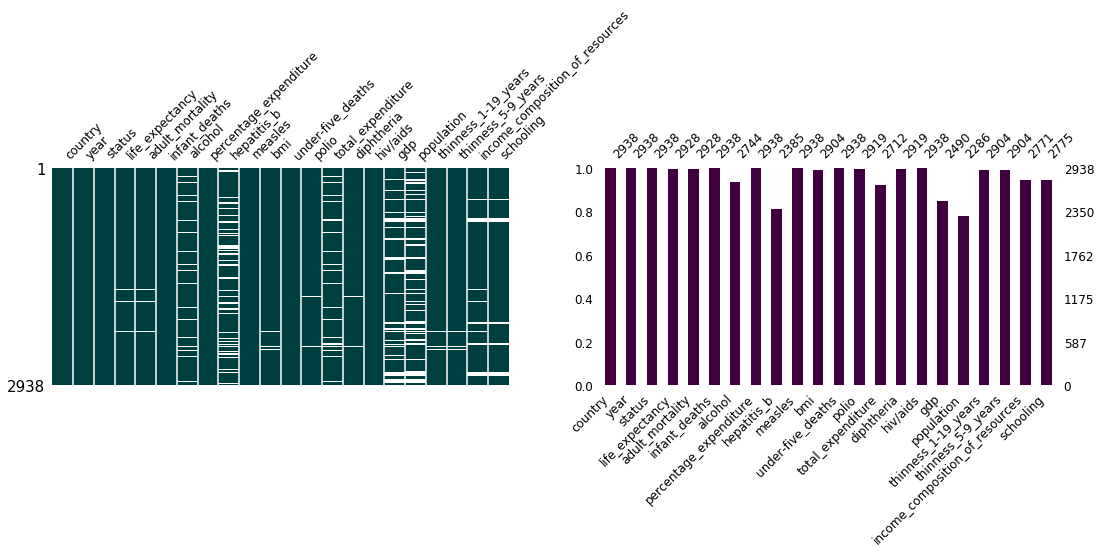

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

In [6]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

dfmiss(df)

,data_type,unique_values,have_null?,how many?,%
country,object,193,False,0,0.000000
year,int64,16,False,0,0.000000
status,object,2,False,0,0.000000
life_expectancy,float64,362,True,10,0.340368
adult_mortality,float64,425,True,10,0.340368
infant_deaths,int64,209,False,0,0.000000
alcohol,float64,1076,True,194,6.603131
percentage_expenditure,float64,2328,False,0,0.000000
hepatitis_b,float64,87,True,553,18.822328
measles,int64,958,False,0,0.000000


##### Our target variable is life_expectancy and we don't want any missing data in that column. So, let's get rid of 'em.

In [7]:
df = df[df['life_expectancy'].notnull()]

##### Which columns contain missing values?

In [8]:
d = dfmiss(df)
missing_val_col = d[d['have_null?'] == True].index.to_list()

#### Handling Missing Values: What kind of inputation helps the most? Mean-Median-Mode or Random Sampling? Let's see through plots!

In [9]:
def impute_nan(df, variable, median, mean):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_mean"] = df[variable].fillna(mean)
    df[variable + "_random"] = df[variable]
    # It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

In [10]:
def comp(col):
    median = df[col].median()
    mean = df[col].mean()

    impute_nan(df, col, median, mean)

    fig = plt.figure(figsize = (8, 5))
    ax = fig.add_subplot(111)
    
    df[col].plot(kind='kde', ax=ax, color='black')
    df[col +'_median'].plot(kind='kde', ax=ax, color='seagreen')
    df[col +'_mean'].plot(kind='kde', ax=ax, color='gray')
    df[col +'_random'].plot(kind='kde', ax=ax, color='salmon')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

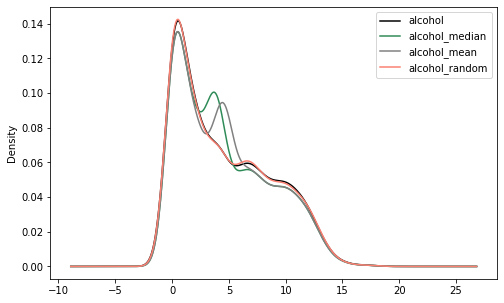

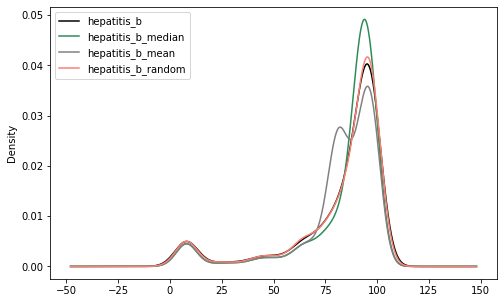

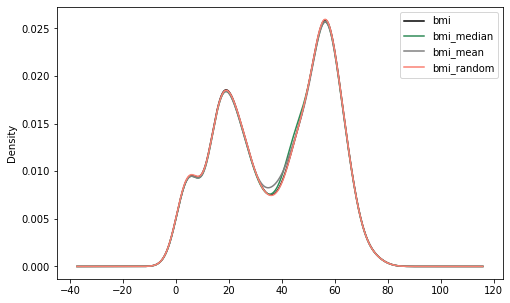

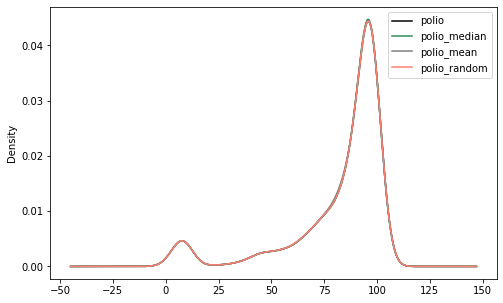

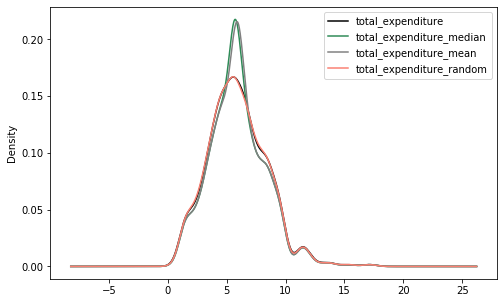

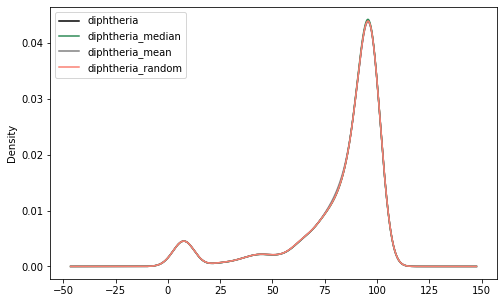

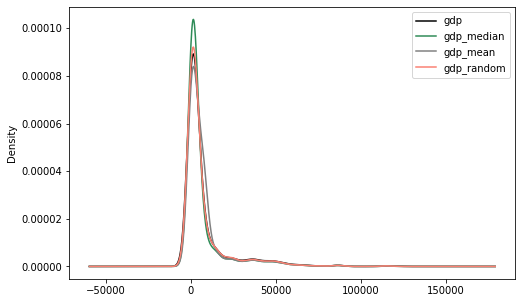

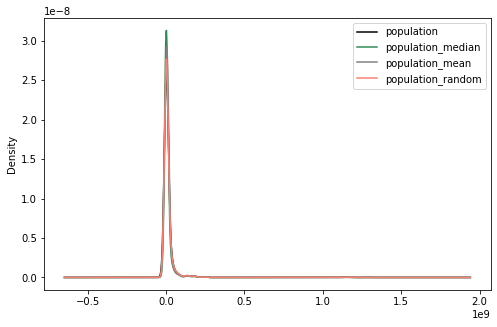

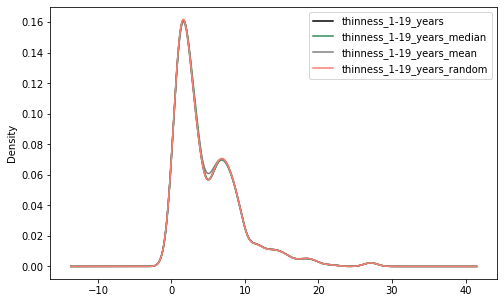

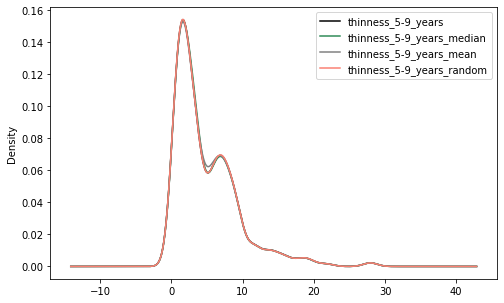

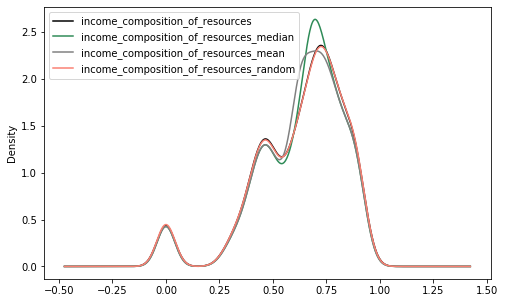

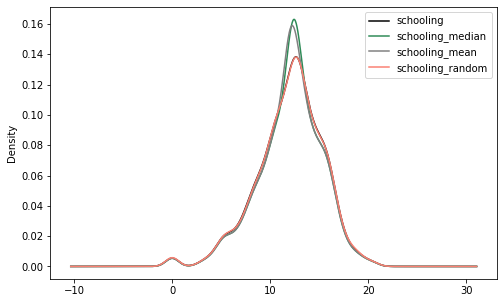

In [11]:
for col in missing_val_col:
    comp(col)

##### **Clearly random sampling imputation works best in this scenario.**

##### Let's apply above mentioned imputation for the dataset now!

In [12]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_')
df = df[df['life_expectancy'].notnull()]
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
def impute_nan(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample
    
for col in missing_val_col:
    impute_nan(df, col)

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

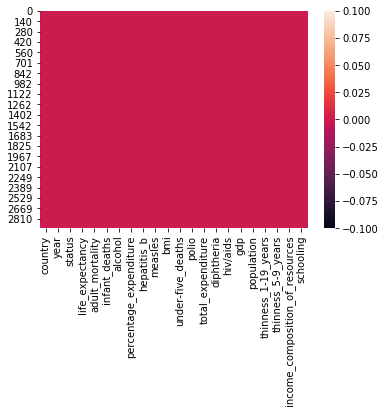

In [14]:
sns.heatmap(pd.isnull(df))
df.isnull().sum()

In [15]:
df.to_csv('eda_data.csv')

##### **Cool! We got rid of the missin values now!**

#### Encoding Categorical Features

In [16]:
# Ordinal Encoding of df.status

df.status.unique()
dictionary = {'Developing':1, 'Developed':2}
df['status']= df['status'].map(dictionary)

# Label Encoding of df.country

dict_count = {'Afghanistan' : 0,
'Albania' : 1,
'Algeria' : 2,
'Angola' : 3,
'Antigua and Barbuda' : 4,
'Argentina' : 5,
'Armenia' : 6,
'Australia' : 7,
'Austria' : 8,
'Azerbaijan' : 9,
'Bahamas' : 10,
'Bahrain' : 11,
'Bangladesh' : 12,
'Barbados' : 13,
'Belarus' : 14,
'Belgium' : 15,
'Belize' : 16,
'Benin' : 17,
'Bhutan' : 18,
'Bolivia (Plurinational State of)' : 19,
'Bosnia and Herzegovina' : 20,
'Botswana' : 21,
'Brazil' : 22,
'Brunei Darussalam' : 23,
'Bulgaria' : 24,
'Burkina Faso' : 25,
'Burundi' : 26,
"Côte d'Ivoire" : 27,
'Cabo Verde' : 28,
'Cambodia' : 29,
'Cameroon' : 30,
'Canada' : 31,
'Central African Republic' : 32,
'Chad' : 33,
'Chile' : 34,
'China' : 35,
'Colombia' : 36,
'Comoros' : 37,
'Congo' : 38,
'Costa Rica' : 39,
'Croatia' : 40,
'Cuba' : 41,
'Cyprus' : 42,
'Czechia' : 43,
"Democratic People's Republic of Korea" : 44,
'Democratic Republic of the Congo' : 45,
'Denmark' : 46,
'Djibouti' : 47,
'Dominican Republic' : 48,
'Ecuador' : 49,
'Egypt' : 50,
'El Salvador' : 51,
'Equatorial Guinea' : 52,
'Eritrea' : 53,
'Estonia' : 54,
'Ethiopia' : 55,
'Fiji' : 56,
'Finland' : 57,
'France' : 58,
'Gabon' : 59,
'Gambia' : 60,
'Georgia' : 61,
'Germany' : 62,
'Ghana' : 63,
'Greece' : 64,
'Grenada' : 65,
'Guatemala' : 66,
'Guinea' : 67,
'Guinea-Bissau' : 68,
'Guyana' : 69,
'Haiti' : 70,
'Honduras' : 71,
'Hungary' : 72,
'Iceland' : 73,
'India' : 74,
'Indonesia' : 75,
'Iran (Islamic Republic of)' : 76,
'Iraq' : 77,
'Ireland' : 78,
'Israel' : 79,
'Italy' : 80,
'Jamaica' : 81,
'Japan' : 82,
'Jordan' : 83,
'Kazakhstan' : 84,
'Kenya' : 85,
'Kiribati' : 86,
'Kuwait' : 87,
'Kyrgyzstan' : 88,
"Lao People's Democratic Republic" : 89,
'Latvia' : 90,
'Lebanon' : 91,
'Lesotho' : 92,
'Liberia' : 93,
'Libya' : 94,
'Lithuania' : 95,
'Luxembourg' : 96,
'Madagascar' : 97,
'Malawi' : 98,
'Malaysia' : 99,
'Maldives' : 100,
'Mali' : 101,
'Malta' : 102,
'Mauritania' : 103,
'Mauritius' : 104,
'Mexico' : 105,
'Micronesia (Federated States of)' : 106,
'Mongolia' : 107,
'Montenegro' : 108,
'Morocco' : 109,
'Mozambique' : 110,
'Myanmar' : 111,
'Namibia' : 112,
'Nepal' : 113,
'Netherlands' : 114,
'New Zealand' : 115,
'Nicaragua' : 116,
'Niger' : 117,
'Nigeria' : 118,
'Norway' : 119,
'Oman' : 120,
'Pakistan' : 121,
'Panama' : 122,
'Papua New Guinea' : 123,
'Paraguay' : 124,
'Peru' : 125,
'Philippines' : 126,
'Poland' : 127,
'Portugal' : 128,
'Qatar' : 129,
'Republic of Korea' : 130,
'Republic of Moldova' : 131,
'Romania' : 132,
'Russian Federation' : 133,
'Rwanda' : 134,
'Saint Lucia' : 135,
'Saint Vincent and the Grenadines' : 136,
'Samoa' : 137,
'Sao Tome and Principe' : 138,
'Saudi Arabia' : 139,
'Senegal' : 140,
'Serbia' : 141,
'Seychelles' : 142,
'Sierra Leone' : 143,
'Singapore' : 144,
'Slovakia' : 145,
'Slovenia' : 146,
'Solomon Islands' : 147,
'Somalia' : 148,
'South Africa' : 149,
'South Sudan' : 150,
'Spain' : 151,
'Sri Lanka' : 152,
'Sudan' : 153,
'Suriname' : 154,
'Swaziland' : 155,
'Sweden' : 156,
'Switzerland' : 157,
'Syrian Arab Republic' : 158,
'Tajikistan' : 159,
'Thailand' : 160,
"The former Yugoslav republic of Macedonia": 161,
'Timor-Leste' : 162,
'Togo' : 163,
'Tonga' : 164,
'Trinidad and Tobago' : 165,
'Tunisia' : 166,
'Turkey' : 167,
'Turkmenistan' : 168,
'Uganda' : 169,
'Ukraine' : 170,
'United Arab Emirates' : 171,
"United Kingdom of Great Britain and Northern Ireland" : 172,
'United Republic of Tanzania' : 173,
'United States of America' : 174,
'Uruguay' : 175,
'Uzbekistan' : 176,
'Vanuatu' : 177,
'Venezuela (Bolivarian Republic of)' : 178,
'Viet Nam' : 179,
'Yemen' : 180,
'Zambia' : 181,
'Zimbabwe' : 182}

### Let's look at the DataFrame before saving it as a csv file for future use.

df['country']= df['country'].map(dict_count)
print ("Shape of the DataFrame:", df.shape)
print (df.isnull().sum())
df.head(50)

Shape of the DataFrame: (2928, 22)
country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,0,2010,1,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,0,2009,1,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,0,2008,1,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,0,2007,1,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,0,2006,1,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [17]:
df.to_csv('Preprocessed_Life_Expectancy_Data.csv')